# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [15]:
import pandas as pd 
import sklearn 
import numpy as np

### Read the csv data into a pandas dataframe and display the first 5 samples

In [16]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [18]:
num_samples , num_columns = df.shape
print(f'Number of samples in the dataset: {num_samples}')
print(f'Number of columns in the dataset: {num_columns}')

Number of samples in the dataset: 414
Number of columns in the dataset: 8


### What are the features available in the dataset?

In [19]:
print(f'Number of features in the dataset:-\n{df.columns}')


Number of features in the dataset:-
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


### Check if any features have missing data

In [20]:
print(f'Misssing data in the dataset:- \n{df.isnull().sum()}')

Misssing data in the dataset:- 
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [21]:
X = df.drop(['Y house price of unit area'],axis=1)
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


### Group feature(s) as independent features in y

In [22]:
y = df["Y house price of unit area"]
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

### Split the dataset into train and test data

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['Y house price of unit area'],axis=1)
y = df["Y house price of unit area"]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


### Choose the model (Linear Regression)

In [24]:
from sklearn.linear_model import LinearRegression


### Create an Estimator object

In [25]:
model = LinearRegression()
model

LinearRegression()

### Train the model

In [26]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [34]:
y_pred = model.predict(X_test)


### Display the coefficients

In [28]:
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients_df)

                                  Feature  Coefficient
0                                      No    -0.004154
1                     X1 transaction date     4.007867
2                            X2 house age    -0.230222
3  X3 distance to the nearest MRT station    -0.004209
4         X4 number of convenience stores     1.184299
5                             X5 latitude   220.589799
6                            X6 longitude    -4.590462


### Find how well the trained model did with testing data

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 6.213256007949333
Mean Squared Error: 105.52823131078642
Root Mean Square Error: 10.272693478868453
R2 Score: 0.5420277763711604


### Plot House Age Vs Price
#### Hint: Use regplot in sns

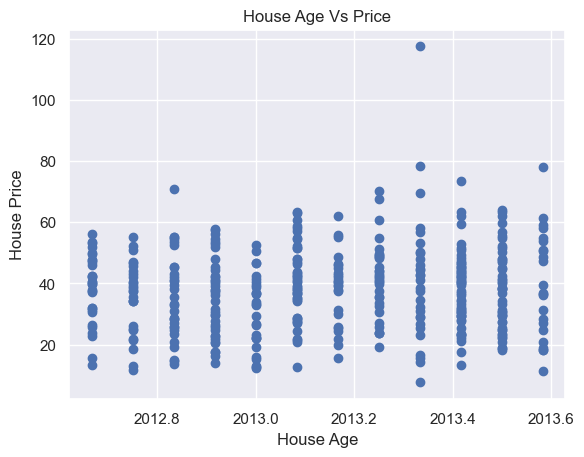

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.scatter( df['X1 transaction date'], y = df['Y house price of unit area'])
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('House Age Vs Price')
plt.show()

### Plot Distance to MRT station Vs Price

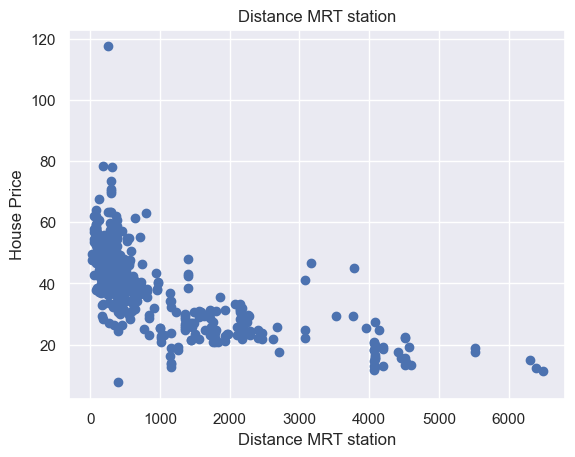

In [31]:
sns.set_theme()
plt.scatter( df['X3 distance to the nearest MRT station'], y = df['Y house price of unit area'])
plt.xlabel('Distance MRT station')
plt.ylabel('House Price')
plt.title('Distance MRT station')
plt.show()

### Plot Number of Convienience Stores Vs Price

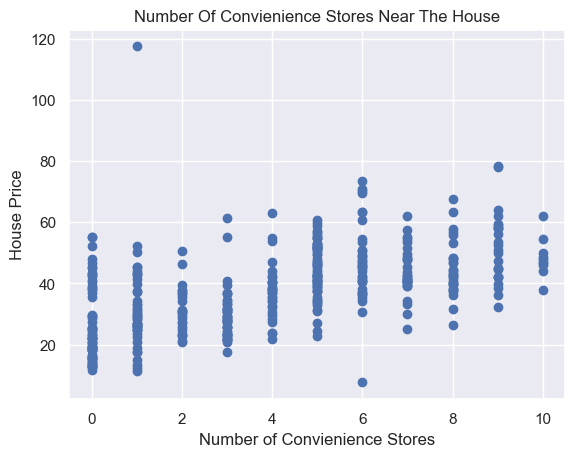

In [32]:
sns.set_theme()
plt.scatter( df['X4 number of convenience stores'], y = df['Y house price of unit area'])
plt.xlabel('Number of Convienience Stores')
plt.ylabel('House Price')
plt.title('Number Of Convienience Stores Near The House')
plt.show()